# **Laboratorium 5**

## Sieć wielowarstwowa, uczenie

### Problem XOR

In [336]:
#zmienne występujące w algorytmie
L=2     #liczba warstw
mi=0.1  #współczynnik uczenia

N=[2,2,1]   #liczba neuronów dla każdej z warstw; N0 wejściowa, N1 ukryta, N2 wyjściowa 

w=[                       #wartosci wag
   [],                    #warstwa 0 (brak neuronów)
   [[],[0,0,0],[0,0,0]],  #warstwa 1 (nie ma neuronu 0, neuron 1 i 2 ma 3 wagi)
   [[],[0,0,0]]           #warstwa 2 (nie ma neuronu 0, neuron 1 ma 3 wagi)
  ]

s=[                 #wartości sum s
   [],              #warstwa 0
   [None,0,0],      #warstwa 1
   [None,0]         #warstwa 2
  ]

x=[             #wartości wejść x
   [],          #warstwa 0
   [-1,0,0],    #warstwa 1 (3 wejścia dla każego neuronu)
   [-1,0,0]     #warstwa 2 (3 wejścia dla każego neuronu)
  ]

y=[             #wartości wyjściowe neuronów
   [],          #warstwa 0
   [None,0,0],  #warstwa 1 posiada 2 wyjścia (dla neuronu 1 i 2)
   [None,0]     #warstwa 2 posiada 1 wyjście (dla neuronu 1)
  ]

e=[             #błąd sygnału wyjściowego ε
   [],
   [None,0,0],
   [None,0]
  ]

dlt=[           #wartość korekty błędu
     [],
     [None,0,0],
     [None,0]
]


In [337]:
import math

#funkcja aktywacji "sigmoida"
def f(s):
  return 1/(1+math.exp(-s))

#pochodna funkcji aktywacji
def f_poch(s):
  return f(s)*(1-f(s))

In [338]:
def licz_y(u):            #licz_y <- oblicznie odpowiedzi sieci neuronowej na zadane wejście
  for k in range(1,L+1):
    for i in range(1,N[k-1]+1):
      if k==1:
        x[k][i]=u[i-1]
      else:
        x[k][i]=y[k-1][i]

    for i in range(1,N[k]+1):
      s[k][i]=0
      for j in range(0,N[k-1]+1):
        s[k][i] += w[k][i][j]*x[k][j]
      y[k][i]=f(s[k][i])
  return y[L][1]  

In [339]:
def licz_e(d):            #licz_e <- oblicznie wartości błędów w kolenych warstwach
  for k in range(L, 1-1, -1):
    for i in range(1, N[k]+1):
      if k==L:
        e[k][i] = d - y[k][i]
      else:
        e[k][i]=0
        for j in range(1,N[k+1]+1):
          e[k][i] += dlt[k+1][j]*w[k+1][j][i]
      dlt[k][i]=e[k][i]*f_poch(s[k][i])

In [340]:
import random

#losowanie wag
def losuj_w():
  for k in range(1,L+1):                  #iteracja od 1 do liczby warstw
    for i in range(1,N[k]+1):             #iteracja od 1 do liczby neuronów w każdej warstwie k
      for j in range(0,N[k-1]+1):         #iteracja po liczbie wejść pochodzących z poprzedniej warstwy k-1
        w[k][i][j]=random.random()*2-1    #losowana jest waga z zakresu od -1 do 1

In [341]:
#problem XOR

u=[           #dane wejściowe [u1, u2]
   [0,0],
   [0,1],
   [1,0],
   [1,1]
]
d=[           #wartości oczekiwane na wyjściu
   0,
   1,
   1,
   0
]

In [342]:
losuj_w() #losowanie wag

In [343]:
#Uczenie sieci neuronowej (alogrytm wstecznej propagacji błędu)
for v in range(50000):     #liczba iteracji procesu uczenia (maksymalna)
  Sumaf=0
  for x1 in range(4):     #iteracje przez całą tablicę u <- dane wejściowe
    tempf=licz_y(u[x1]) #obliczanie wartości wyjściowych
    licz_e(d[x1])       #obliczanie wartości błędów

    for k1 in range(L,1-1,-1):            #iteracja po warstwach
      for i1 in range(1,N[k1]+1):         #iteracja po neuronach w warstwie
        for j1 in range(0,N[k1-1]+1):     #iteracja po wagach neuronu
          w[k1][i1][j1]=w[k1][i1][j1]+( 2*mi*dlt[k1][i1]*x[k1][j1] )  #modyfikacja wagi
    
    Sumaf += (d[x1]-tempf)*(d[x1]-tempf)        #obliczanie błędu średniokwadratowego // zadanie 2                         
  if (1/4 * Sumaf) < 0.001:                      # 𝑄<0.001              
    print("Liczba iteracji: "+ str(v+1))        #
    break                                       #przerwanie procesu uczenia przy osiągnięciu dostatecznej dokładności
                                 #

Liczba iteracji: 12187


In [344]:
#wartości wynikowe sieci neuronowej
for i in range(4):    
  print(licz_y(u[i]))

0.03544757289877695
0.9698297057851358
0.9698385086066208
0.030349370860232577


In [345]:
#wartości oczekiwane
for i in range(4):    
  print(d[i])

0
1
1
0


In [346]:
#wartości wynikowe sieci neuronowej (z zaokrągleniem)
for i in range(4):
  print(round(licz_y(u[i]),1))

0.0
1.0
1.0
0.0


### Zadanie 1, 2

In [347]:
#zadanie 1

m=[           #dane wejściowe [u1, u2]
   [0,0],
   [0,1],
   [1,0],
   [1,1]
]
dM=[           #wartości oczekiwane na wyjściu
   0.1,
   0.9,
   0.9,
   0.1
]

In [348]:
losuj_w() #losowanie wag

In [349]:
#Uczenie sieci neuronowej (alogrytm wstecznej propagacji błędu)
for v in range(50000):     #liczba iteracji procesu uczenia
  Sumaf=0
  for x1 in range(4):     #iteracje przez całą tablicę u <- dane wejściowe
    tempf=licz_y(m[x1]) #obliczanie wartości wyjściowych
    licz_e(dM[x1])       #obliczanie wartości błędów

    for k1 in range(L,1-1,-1):            #iteracja po warstwach
      for i1 in range(1,N[k1]+1):         #iteracja po neuronach w warstwie
        for j1 in range(0,N[k1-1]+1):     #iteracja po wagach neuronu
          w[k1][i1][j1]=w[k1][i1][j1]+( 2*mi*dlt[k1][i1]*x[k1][j1] )  #modyfikacja wagi
    
    Sumaf += (dM[x1]-tempf)*(dM[x1]-tempf)    #obliczanie błędu średniokwadratowego // zadanie 2                         
  if (1/4 * Sumaf) < 0.001:                     # 𝑄<0.001              
    print("Liczba iteracji: "+ str(v+1))        #
    break                                       #przerwanie procesu uczenia przy osiągnięciu dostatecznej dokładności
                              

Liczba iteracji: 5636


In [350]:
#wartości wynikowe sieci neuronowej
for i in range(4):    
  print(licz_y(m[i]))

0.11906275805421782
0.8719961164312492
0.8717763752532779
0.1449150522562116


In [351]:
#wartości oczekiwane
for i in range(4):    
  print(dM[i])

0.1
0.9
0.9
0.1


In [352]:
#wartości wynikowe sieci neuronowej (z zaokrągleniem)
for i in range(4):
  print(round(licz_y(m[i]),1))

0.1
0.9
0.9
0.1


### Zadanie 3

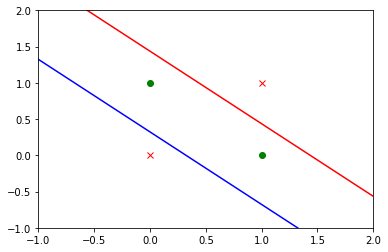

In [353]:
import numpy as np
import matplotlib.pyplot as plt

#linie decyzyjne pierwszych dwóch neuronów (w pierwszej warstwie)
xx=np.arange(-1,3)
yy1=-(w[1][1][1]/w[1][1][2]) * xx + (w[1][1][0]/w[1][1][2])
plt.plot(xx, yy1, 'r-')         #czerwona, ciagłą: 
                                #         linia decyzyjna: warstwa 1, neuron 1

yy2=-(w[1][2][1]/w[1][2][2]) * xx + (w[1][2][0]/w[1][2][2])
plt.plot(xx, yy2, 'b-')         #niebieska, ciagłą: 
                                #         linia decyzyjna: warstwa 1, neuron 2

for i in range(len(m)):
  if dM[i]==0.1:
    plt.plot(m[i][0],m[i][1],'rx')
  else:
    plt.plot(m[i][0],m[i][1],'go')
plt.axis([-1,2,-1,2])
plt.show()

### Zadanie 4

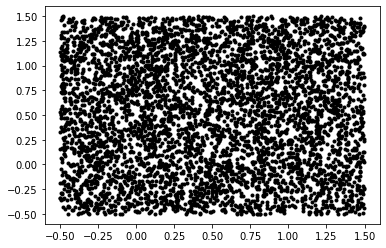

In [354]:
#tworzenie testowego zboiru punktów (u1,u2)
sizeT=5000
test = np.random.random([sizeT,2]) * 2 - 0.5

plt.plot(test[:,0], test[:,1],'.',color='black')
plt.show()

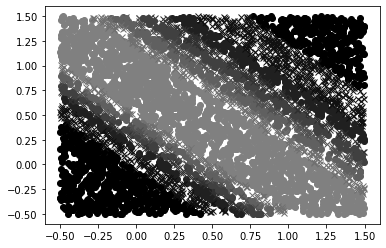

In [355]:
for v333 in range(0,sizeT):
  res=licz_y(test[v333])

  if (res>=0.0 and res<=0.1):
    plt.plot(test[v333,0],test[v333,1],'o',color='#000000')
  elif (res<=0.2):
    plt.plot(test[v333,0],test[v333,1],'x',color='#101010')
  elif (res<=0.3):
    plt.plot(test[v333,0],test[v333,1],'o',color='#202020')
  elif (res<=0.4):
    plt.plot(test[v333,0],test[v333,1],'x',color='#303030')
  elif (res<=0.5):
    plt.plot(test[v333,0],test[v333,1],'o',color='#404040')
  elif (res<=0.6):
    plt.plot(test[v333,0],test[v333,1],'x',color='#505050')
  elif (res<=0.7):
    plt.plot(test[v333,0],test[v333,1],'o',color='#606060')
  elif (res<=0.8):
    plt.plot(test[v333,0],test[v333,1],'x',color='#707070')
  elif (res<=0.9):
    plt.plot(test[v333,0],test[v333,1],'o',color='#808080')
  elif (res<=1.0):
    plt.plot(test[v333,0],test[v333,1],'x',color='#909090')

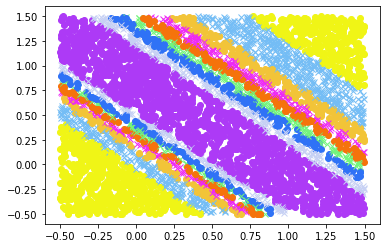

In [356]:
for v333 in range(0,sizeT):
  res=licz_y(test[v333])

  if (res>=0.0 and res<=0.1):                                   #kolor
    plt.plot(test[v333,0],test[v333,1],'o',color='#F0F516')     #żółty
  elif (res<=0.2):
    plt.plot(test[v333,0],test[v333,1],'x',color='#74BDF5')     #jasno-niebieski
  elif (res<=0.3):
    plt.plot(test[v333,0],test[v333,1],'o',color='#F2C438')     #pomarańczowy
  elif (res<=0.4):
    plt.plot(test[v333,0],test[v333,1],'x',color='#EE29F5')     #różowy
  elif (res<=0.5):
    plt.plot(test[v333,0],test[v333,1],'o',color='#F5730B')     #czerwono-pomarańczowy
  elif (res<=0.6):
    plt.plot(test[v333,0],test[v333,1],'x',color='#73F57C')     #zielony
  elif (res<=0.7):
    plt.plot(test[v333,0],test[v333,1],'o',color='#2F72F6')     #niebieski
  elif (res<=0.8):
    plt.plot(test[v333,0],test[v333,1],'x',color='#C7D1F4')     #szary
  elif (res<=0.9):
    plt.plot(test[v333,0],test[v333,1],'o',color='#AD3AF6')     #fioletowy
  elif (res<=1.0):
    plt.plot(test[v333,0],test[v333,1],'x',color='black')       #czarny